In [1]:
from packages import *

# Versuchsnachrechnung Zweifeldplatte

Nachrechnung des Plattenversuchs aus @thoma_plattenversuche_2010. Gleiche Kraftintensität auf allen Zylindern. Eigengewicht hat keinen Einfluss auf Messung, Nullsetzung bei Belastungsbeginn.


![Isometrische Ansicht des Versuchsaufbaus, dargestellt sind der Versuchsaufbau, die Lagerung mit den Zylindern, die Krafteinleitung mittels den Zugstangen](../imgs/tho_aufbau_iso.svg){#fig-tho_aufbau_iso}

Der Grundriss und die Längsansicht sich in der @fig-tho_aufbau_gr gezeigt. Beide Felder sind quatratförmig. Diese sind auf Gleitlagern gelagt.

![Grundriss und Längsansicht, Lasteineinleitung, Lagerposition und die Plattenabmessungen sind vermasst](../imgs/tho_aufbau_gr.svg){#fig-tho_aufbau_gr}

## Versuchsbeschrieb

Nach dem Einbringen des Körpers wurde eine Nullmessung durchgeführt. Die Last wurde gleichmässigen auf sämtliche Zugstangen verteilt. Die Kraft wurde inkrementiell gesteigert bis der Bruch durch Zerreissen der oberen Längsbewehrungen im mittleren
Auflagerbereich eintrat.

### Berechnungsgrössen

Die verwendeten Berechnungsparameter werden folgend aufgezeigt.

#### Betonstahl 

Die Platte ist kreuzweise mit einer Biegebewehrung mit Durchmesser 10 mm und einer 150 mm Teilung versehen. Dies gilt für die obere und untere Bewehrung. Am Rand sind Abschlussbügel verlegt. Zudem ist über dem Mittelauflager eine Querkraftbewehrung eingelegt. Da generell in dieser Arbeit keine Querkraftthemen bearbeitet werden, ist diese auf der @fig-tho_biegebewehrung_iso nicht dargestellt.

![Biegebewehrung der Platte](../imgs/tho_biegebewehrung_iso.svg){#fig-tho_biegebewehrung_iso}

Die Querschnittsfläche der Biegebewehrung pro Laufmeter beträgt folglich:

In [2]:
diam_s = 10*un.mm

s = 150*un.mm
a_s = (diam_s**2*np.pi /4 /s).to(un.mm**2/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
\oslash_{s}& = 10 \ \mathrm{mm} \quad & s& = 150 \ \mathrm{mm} \quad & a_{s}& = \frac{\pi \cdot \oslash_{s}^{2}}{4 \cdot s} = 523.6 \ \frac{\mathrm{mm}^{2}}{\mathrm{m}} \end{aligned}
$$

Aus dem Versuchsbericht wurden die folgenden Eigenschaften der Biegebewehrung entnommen. Die Zugfestigkeit, Fliessgrenze, Elastizitätsmodul, Fliessdehnung und Bruchdehnung.

In [3]:
f_su = 558.6*un.N/un.mm**2
f_sy = 445.6*un.N/un.mm**2

E_s = 196.5*un.kN/un.mm**2

eps_sy = (f_sy / E_s).to(un.permille)
eps_su = 80.8*un.permille

put_out(symbolic=True)

$$
\begin{aligned}
f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{sy}& = 445.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{s}& = 196.5 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
\varepsilon_{sy}& = \frac{f_{sy}}{E_{s}} = 2.27 \ \mathrm{‰} \quad & \varepsilon_{su}& = 80.8 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

#### Beton 

Ebenso wurden die Eigenschaften des Betons aus dem Versuchsbericht entnommen, sowie mittels empirischen Ansätzen umgerechnet. Die Zylinderdruckfestigkeit und der Elastizitätsmodul wurden aus dem Bericht entnommen. Die Bauteildruckfestigkeit und Zugfestigkeiten wurden berechnet. Sowie wird eine Bruchstauchung angenommen.

In [4]:
f_cc = 28.61*un.N/un.mm**2
E_c = 22.9*un.kN/un.mm**2

f_c = (2.7* f_cc.m**(2/3))*un.N/un.mm**2
f_ct = (0.3* f_cc.m**(2/3))*un.N/un.mm**2

eps_cu = 5.*un.permille

put_out(symbolic=True, rows = 3)

$$
\begin{aligned}
f_{cc}& = 28.61 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{c}& = 22.9 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \quad & f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
f_{ct}& = 0.3 \cdot f_{cc}^{\frac{2}{3}} = 2.81 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

#### Geometrie

Bezüglich der Geometrie wurden die Plattenstärke und Bewehrungsüberdeckung aus dem Bericht übernommen.

In [5]:
h = 200*un.mm
c_nom = 20*un.mm

put_out()

$$
\begin{aligned}
h& = 200 \ \mathrm{mm} \quad & c_{nom}& = 20 \ \mathrm{mm} \quad &  
 \end{aligned}
$$

### Versuchsergebnisse

Aus dem Versuchsbericht geht eine Traglast von 978 kN pro Feld hervor. Dies entspricht der Summe der einzelnen Zugstangen pro Feld. Folglich beträgt die Traglast pro Einzellast:

In [6]:
F_u = 978*un.kN / 12

put_out(symbolic=True)

$$
\begin{aligned}
F_{u}& = \frac{978}{12} = 81.5 \ \mathrm{kN} \quad &  \quad &  
 \end{aligned}
$$

![Position der Wegaufnehmer, vermasst auf Lagerachsen](../imgs/tho_messung_gr.svg){#fig-tho_messung_gr}

Die Messung $V10$ ist in der @fig-tho_res_V10 gezeigt. Dabei ist auf der Ordinate die Summe der Einzelkräfte pro Feld aufgezeigt und auf der Abszisse die Verformung an der Stelle $V10$.

In [7]:
DF_res_V10 = pd.read_csv('imgs/tho_res_V10.csv')


In [8]:
# | echo: false


fig_res_V10, ax_res_V10 = plt.subplots()
ax_res_V10.plot(DF_res_V10.iloc[:,0], DF_res_V10.iloc[:,1], color="k")


# Set axis labels
ax_res_V10.set_ylabel(r"$F$ [kN]")
ax_res_V10.set_xlabel(r"$w_{V10}$ [mm]")


fig_res_V10.savefig("imgs/tho_res_V10.svg")
plt.close()

![Kraft-Verformungs-Diagramm an der Stelle $V10$, entnommen aus dem Versuchsbericht](../imgs/tho_res_V10.svg){#fig-tho_res_V10}

Beim Erreichen der Traglast stellt sich ein Zerreissen der Bewehrung über dem Mittellager ein und das Tragwerk versagt. Ein einfaches Biegeversagen.

## Modellierung

Die @fig-tho_rost_iso zeigt ein schematisches Trägerrostmodell. Dies dient als statisches System. Dabei werden an den entsprechenden Stellen die Einzellasten eingeführt. Die Auflager sind 1-dimensional, sprich lagern lediglich Kräfte in globaler $Z$-Richtung.

![Ein Trägerrostmodell zur Ermittlung des Biegeverhaltens. Der Abstand der Balken ist hier lediglich schematisch gezeigt](../imgs/tho_rost_iso.svg){#fig-tho_rost_iso}


Folgende Effekte werden beim Modell berücksichtigt:

- Biegetragverhalten
- Drillmomente, sprich Torsion der Stäbe im Trägerrost.

### Baustoffe

In [9]:
DF_b500b = pd.read_csv('imgs/tho_stress_strain_b500b.csv')
DF_b500b['x'] = DF_b500b['x']/100



In [10]:
# | echo: false

stress_b500b_array = np.array([0, f_sy.m, f_su.m]) * un.MPa
strain_b500b_array = np.array([0, eps_sy.to(un.los), eps_su.to(un.los)])

fig_b500b, ax_b500b = plt.subplots()
ax_b500b.plot(strain_b500b_array, stress_b500b_array.to(un.MPa).m, color="k")
ax_b500b.plot(DF_b500b.iloc[:,0], DF_b500b.iloc[:,1], color="gray", alpha=0.5)

# Scientific Notation if needed
apply_scientific_notation(ax_b500b, stress_b500b_array.m)

# Set axis labels
ax_b500b.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_b500b.set_xlabel(r"$\varepsilon_s$ [-]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_b500b.svg")
plt.close()

Zunächst wird das Verhalten der Baustoffe modelliert. Für den Betonstahl wird ein bilinearer Verlauf gewählt. Dargestellt als Spannungs-Dehnungs-Diagramm ist dies in @fig-tho_stress_strain_b500b. Grau hinterlegt ist der Spannungs-Dehnungs-Verlauf aus den Zugproben.

![Spannungs-Dehnungs-Diagramm des Betonstahls B500B mit grau hinterlegten Versuchsdaten und die Idealisierung eines bilinearen Verlaufs](../imgs/tho_stress_strain_b500b.svg){#fig-tho_stress_strain_b500b}

Für den Beton gilt die Darstellung in @fig-tho_stress_strain_c. Die Zugfestigkeit des Betons wird berücksichtigt.

In [11]:
# | echo: false

stress_c_array = np.array([f_ct.m, -f_c.m, -f_c.m]) * un.MPa
strain_c_array = np.array([f_ct/E_c, -f_c/E_c, -eps_cu.to(un.los)])

fig_c, ax_c = plt.subplots()
ax_c.plot(strain_c_array, stress_c_array.to(un.MPa).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_c, stress_c_array.m)

# Set axis labels
ax_c.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_c.set_xlabel(r"$\varepsilon_c$ [-]")

# Set limits
# ax_c.set_xlim(xmax=7 / 1000)
# ax_c.set_ylim(ymax=50)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_c.svg")
plt.close()

![Spannungs-Dehnungs-Diagramm des Betons, linear elastischer - ideal plastischer Verlauf](../imgs/tho_stress_strain_c.svg){#fig-tho_stress_strain_c}

### Trägerrost

Danach wird der Trägerrost modelliert. Es wird eine Stabteilung gewählt. Zudem wird eine Anzahl Gelenke pro Knoten definiert. Im Statischensystem werden den Stäben ein Anfang- und Endgelenk eingeführt. Dies führt zur Anzahl Gelenke.

![Anordnung der Gelenke bei einem Knoten](../imgs/tho_rost_gelenke.png)


In [12]:
l_El = 0.10*un.m
n_gelenk = 1 #2 bei Stab anfang und ende

put_out(symbolic=True)


$$
\begin{aligned}
l_{El}& = 0.1 \ \mathrm{m} \quad & n_{gelenk}& = 1 \quad &  
 \end{aligned}
$$

### Biegeverhalten

Basierend auf den Modellen der Baustoffe kann der Querschnitt bei steigender Krümmung untersucht werden. Dies führt zu einem Momenten-Krümmungs-Diagramm. 


![Querschnittsanalyse](../imgs/thesis_skizzen-2.jpg)



Zunächst wird das Rissmoment betrachtet:

In [13]:
b_w = l_El
z = h - 2/3 * h/2
F_c = (h/2 * f_ct * b_w *1/2).to(un.kN)
M_r = (F_c * z).to(un.kNm)

chi_r = (f_ct/E_c /(h/2)).to(1/un.km)

put_out(symbolic=True, evaluate=True, rows = 2)

$$
\begin{aligned}
b_{w}& = l_{El} = 0.1 \ \mathrm{m} \quad & z& = \frac{2 \cdot h}{3} = 133.33 \ \mathrm{mm} \\ 
F_{c}& = \frac{b_{w} \cdot f_{ct} \cdot h}{4} = 14.03 \ \mathrm{kN} \quad & M_{r}& = F_{c} \cdot z = 1.87 \ \mathrm{kNm} \\ 
\chi_{r}& = \frac{2 \cdot f_{ct}}{E_{c} \cdot h} = 1.23 \ \frac{1}{\mathrm{km}} \quad &  
 \end{aligned}
$$

Fliessen der Zugbewehrung. Dabei wird ein dreieckiger Spannungsverlauf für den Beton angesetzt.


In [14]:
A_s = a_s*b_w
sigma_s_2 = 500*un.N/un.mm**2
d_apos = h - c_nom - diam_s / 2
x = ((A_s*f_sy) / (f_c*b_w*1/2 )).to(un.mm)
put_out(symbolic=True, rows = 2)



$$
\begin{aligned}
A_{s}& = a_{s} \cdot b_{w} = 52.36 \ \mathrm{mm}^{2} \quad & \sigma_{s 2}& = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
{d}'& = - \frac{\oslash_{s}}{2} - c_{nom} + h = 175.0 \ \mathrm{mm} \quad & x& = \frac{A_{s} \cdot f_{sy}}{1 \cdot \frac{1}{2} \cdot b_{w} \cdot f_{c}} = 18.48 \ \mathrm{mm} \end{aligned}
$$

Nun wird kontrolliert ob der Beton sich noch im elastischen Bereich befindet:

In [15]:
eps_c = (f_sy / E_s  / (d_apos - x) * x).to(un.permille)
sigma_c = (eps_c * E_c).to(un.N/un.mm**2)
f_c

put_out(symbolic=True, rows = 2)


$$
\begin{aligned}
\varepsilon_{c}& = \frac{f_{sy} \cdot x}{E_{s} \cdot \left({d}' - x\right)} = 0.27 \ \mathrm{‰} \quad & \sigma_{c}& = E_{c} \cdot \varepsilon_{c} = 6.13 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad &  
 \end{aligned}
$$

Die Spannung bei der Randfaser ist deutlich kleiner als die Druckfestigkeit. Folglich plastifiziert der Beton bei Weitem noch nicht.

In [16]:
z = d_apos - 1/3*x
F_s = (A_s * f_sy ).to(un.kN)
M_y = (F_s * z).to(un.kNm)
chi_y = (eps_sy /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2)

$$
\begin{aligned}
z& = {d}' - 1 \cdot \frac{1}{3} \cdot x = 168.84 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot f_{sy} = 23.33 \ \mathrm{kN} \\ 
M_{y}& = F_{s} \cdot z = 3.94 \ \mathrm{kNm} \quad & \chi_{y}& = \frac{\varepsilon_{sy}}{{d}' - x} = 14.49 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

Abschliessend lässt sich der Biegewiderstand bestimmen. Dem Beton wird ein vollständiges Plastifizieren vorausgesetzt. Dabei wird dem Stahl eine Dehnung vorausgesetzt.

![Querschnittsanalyse](../imgs/thesis_skizzen-3.jpg)

Dabei wird die Stahlspannung anhand der gewählten Dehnung bestimmt:

In [17]:
eps_s = 63*un.permille
sigma_s = np.interp(eps_s.to(un.los), strain_b500b_array, stress_b500b_array).to(un.N/un.mm**2)
f_su
put_out()

$$
\begin{aligned}
\varepsilon_{s}& = 63 \ \mathrm{‰} \quad & \sigma_{s}& = 532.99 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die Stahldehnung wird iterativ bestimmt, damit sich eine Betonstauchung der Randfaser entsprechend der Bruchstauchung einstellt.

In [18]:
x = ((A_s*sigma_s) / (f_c*b_w*0.85)).to(un.mm)
eps_c = (eps_s  / (d_apos - x) * x).to(un.permille)
eps_cu

put_out(symbolic=True)


$$
\begin{aligned}
x& = \frac{A_{s} \cdot \sigma_{s}}{0.85 \cdot b_{w} \cdot f_{c}} = 13.0 \ \mathrm{mm} \quad & \varepsilon_{c}& = \frac{\varepsilon_{s} \cdot x}{{d}' - x} = 5.06 \ \mathrm{‰} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \end{aligned}
$$

Der Biegewiderstand ist somit begrenzt durch ein Betondruckversagen. Der entsprechende Widerstand und die entsprechende Bruchkrümmung betragen:

In [19]:
z = d_apos - 0.425*x
F_s = (A_s * sigma_s).to(un.kN)
M_u = (F_s * z).to(un.kNm)
chi_u = (eps_s /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2, evaluate=True)

$$
\begin{aligned}
z& = {d}' - 0.425 \cdot x = 169.48 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot \sigma_{s} = 27.91 \ \mathrm{kN} \\ 
M_{u}& = F_{s} \cdot z = 4.73 \ \mathrm{kNm} \quad & \chi_{u}& = \frac{\varepsilon_{s}}{{d}' - x} = 388.89 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

#### Zugversteifung 

Zur punktuellen Betrachtung des Querschnitts kann das Mitwirken des Betons zwischen den Rissen berücksichtigt werden. Dabei wird der Ansatz nach Marti @spathelf_gebrauchstauglichkeit_2022 verwendet für den gerissenen Bereich. Dabei wird eine Differenzkrümmung bestimmt:

In [20]:
lamda = 1
EI_II = (M_y / chi_y).to(un.kN*un.m**2)
n = E_s / E_c

rho_eff = ((1 + E_s*M_r*(d_apos-x)/(EI_II*f_ct) - n)**-1).to(un.percent)

Delta_chi = (lamda / 2 * f_ct * (1 - rho_eff) /(rho_eff * E_s * (d_apos-x))).to(1/un.km)

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\lambda& = 1 \\ 
EI_{II}& = \frac{M_{y}}{\chi_{y}} = 271.91 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
n& = \frac{E_{s}}{E_{c}} = 8.58 \  \\ 
\rho_{eff}& = \frac{1}{\frac{E_{s} \cdot M_{r} \cdot \left({d}' - x\right)}{EI_{II} \cdot f_{ct}} - n + 1} = 1.42 \ \mathrm{\%} \\ 
\Delta_{\chi}& = \frac{f_{ct} \cdot \lambda \cdot \left(1 - \rho_{eff}\right)}{2 \cdot E_{s} \cdot \rho_{eff} \cdot \left({d}' - x\right)} = 3.06 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

Die Querschnittsanalyse ist abschliessend in der @fig-tho_M_chi zusammengefasst.

In [21]:
# | echo: false

My_qs_array = np.array([0, M_r.m, M_r.m, M_y.m, M_u.m]) * un.kNm
chi_qs_array_zuggurt = np.array([0, chi_r.m, (chi_y / M_y * M_r - Delta_chi).m, chi_y.m-Delta_chi.m, chi_u.m])/un.km

fig_M_chi, ax_M_chi = plt.subplots()
ax_M_chi.plot(chi_qs_array_zuggurt.to(1/un.km).m, My_qs_array.to(un.kNm).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_M_chi, chi_qs_array_zuggurt.m)

# Set axis labels
ax_M_chi.set_ylabel(r"$M$ [kNm]")
ax_M_chi.set_xlabel(r"$\chi$ [1/km]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_chi.svg")
plt.close()

![Momenten-Krümmungs-Beziehung des Querschnitts](../imgs/tho_M_chi.svg){#fig-tho_M_chi}

Aufgrund der identischen Bewehrung in beide Richtungen gilt das Momenten-Krümmungs-Diagramm für beide Richtungen. Obwohl sich kleine Differenzen bei der statischen Höhe ergeben. Dazu wird das Diagramm für positive und negative Biegebeanspruchungen angewendet.

In [22]:
varphi = (chi_qs_array_zuggurt * l_El).to(un.rad)/n_gelenk

My_qs_array


display(varphi, My_qs_array)

Magnitude,[0.0 0.00012254558731905003 0.0003818471576519119 0.001142571578276044 0.03888872930882431]
Units,rad


Magnitude,[0.0 1.8708626330708304 1.8708626330708304 3.93933519233789 4.729574875521492]
Units,kNm


Anhand der Elementlänge $l_{El}$ kann die Verdrehung des Gelenks bestimmt werden. Zusammengefasst in der @fig-tho_biegung.

In [23]:
# | echo: false

phi_qs_array = (chi_qs_array_zuggurt * l_El).to(un.rad)

fig_M_phi, ax_M_phi = plt.subplots()
ax_M_phi.plot(phi_qs_array.to(un.rad).m, My_qs_array.to(un.kNm).m, color="k")


# Set axis labels
ax_M_phi.set_ylabel(r"$M$ [kNm]")
ax_M_phi.set_xlabel(r"$\varphi$ [rad]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_phi.svg")
plt.close()

::: {#fig-tho_biegung layout-ncol=2}

![Momenten-Krümmungs-Beziehung des Querschnitts](../imgs/tho_M_chi.svg){#fig-tho_M_chi}

![Momenten-Verdrehungs-Beziehung des Querschnitts](../imgs/tho_M_phi.svg){#fig-tho_M_phi}

Momenten-Krümmungs-Beziehung und Momenten-Verdrehungs-Beziehung für die Platte in globale $X$ und $Y$ Richtung.
:::

#### Rotationsvermögen

Um das Fliessverhalten abzuschätzen wird das Rotationsvermögen abgeschätzt. Dazu wird eine zulässige Stahldehnung bestimmt anhand der Betonbruchstauchung:

In [24]:
eps_u_com_adm = eps_cu * (d_apos - x) / x

put_out(symbolic=True)

$$
\begin{aligned}
\varepsilon_{u , adm}& = \frac{\varepsilon_{cu} \cdot \left({d}' - x\right)}{x} = 62.31 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

Mit dieser lassen sich das plastische Rotationsvermögen bestimmen:

In [25]:
# Annahme für die Länge des Gelenks
l_pl = 2 * d_apos
eps_cu
# Verformungsvermögen
Theta_max = (l_pl * (eps_cu / x  - eps_sy / (d_apos -x))).to(un.rad)
Theta_max_gelenk = Theta_max / n_gelenk 

put_out(symbolic=True, rows = 1, precision = 3)

$$
\begin{aligned}
l_{pl}& = 2 \cdot {d}' = 350.0 \ \mathrm{mm} \\ 
\varepsilon_{cu}& = 5.0 \ \mathrm{‰} \\ 
\Theta_{max}& = l_{pl} \cdot \left(\frac{\varepsilon_{cu}}{x} - \frac{\varepsilon_{sy}}{{d}' - x}\right) = 0.13 \ \mathrm{rad} \\ 
\Theta_{max gelenk}& = \frac{\Theta_{max}}{n_{gelenk}} = 0.13 \ \mathrm{rad} \end{aligned}
$$

In [26]:
l_pl

<Quantity(350.0, 'millimeter')>

In [27]:
(chi_qs_array_zuggurt*l_pl).to(un.rad)

Magnitude,[0.0 0.00042890955561667506 0.0013364650517816914 0.003999000523966154 0.13611055258088506]
Units,rad


Die Momenten-Krümmungs-Beziehung wird mit dem plastischen Rotationsvermögen erweitert:

In [28]:
phi_qs_array

Magnitude,[0.0 0.00012254558731905003 0.0003818471576519119 0.001142571578276044 0.03888872930882431]
Units,rad


In [29]:
theta_array = np.array([max(phi_qs_array), Theta_max_gelenk])
M_pl_array = np.array([M_u.m, M_u.m])


ax_M_phi.plot(theta_array,  M_pl_array, color='red')
 
fig_M_phi.savefig("imgs/tho_M_phi_theta_max.svg")
plt.close()

![Momenten-Verdrehungs-Diagramm mit dem Rotationsvermögen erweitert](../imgs/tho_M_phi_theta_max.svg){#fig-tho_M_phi_theta_max}

Damit ist das Biegeverhalten der Gelenke definiert. 

### Drillsteifigkeit

Das Torsionsträgheitsmoment für einen Rechteckquerschnitt approximiert:


![Rechteckquerschnitt mit der Breite des Rosts](../imgs/tho_drillsteif_qs.png)

Es wird eine Näherung zur Lösung des Torsionsträgheitmoments für Rechteckquerschnitte verwendet.

In [30]:

beta_Ix =  0.229
I_x = (beta_Ix * h* b_w**3).to(un.mm**4) 

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\beta_{Ix}& = 0.23 \\ 
I_{x}& = b_{w}^{3} \cdot \beta_{Ix} \cdot h = 45800000.0 \ \mathrm{mm}^{4} \end{aligned}
$$

Die ungerissene und gerissene Steifigkeit des Querschnitts wird folgend abgeschätzt:

In [31]:
nu = 0.2
eta_II = 0.2
G_c = E_c / (2*(1+nu))

GI = (I_x * G_c).to(un.kN*un.m**2)
GI_II = eta_II* GI

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\nu& = 0.2 \\ 
\eta_{II}& = 0.2 \\ 
G_{c}& = \frac{E_{c}}{2 \cdot \left(\nu + 1\right)} = 9.54 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
GI& = G_{c} \cdot I_{x} = 437.01 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
GI_{II}& = GI \cdot \eta_{II} = 87.4 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

Und die Steifigkeit des Gelenks beträgt abschliessend:

In [32]:
k_x_II = GI_II*n_gelenk / l_El

put_out(symbolic=True)

$$
\begin{aligned}
k_{x II}& = \frac{GI_{II} \cdot n_{gelenk}}{l_{El}} = 874.02 \ \mathrm{kN} \cdot \mathrm{m} \quad &  \quad &  
 \end{aligned}
$$

Als Vergleichswert hier die Plattensteifigkeit gemäss der Plattengleichung.

In [33]:

k_r = (E_c * (h)**3 / (12*(1-nu)) * eta_II/n_gelenk).to(un.kN*un.m/un.rad)

put_out(symbolic=True)

$$
\begin{aligned}
k_{r}& = \frac{E_{c} \cdot \eta_{II} \cdot h^{3}}{n_{gelenk} \cdot 12 \cdot \left(1 - \nu\right)} = 3816.67 \ \frac{\mathrm{kN} \cdot \mathrm{m}}{\mathrm{rad}} \quad &  \quad &  
 \end{aligned}
$$

## Modellergebnisse

Die Ergebnisse der Berechnung sind hier gezeigt anhand des Last-Verformungs-Diagramms für die Stelle $V10$.

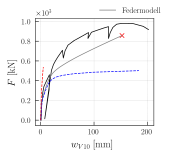

In [34]:
DF_rost_axis_V10 = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10')
DF_rost_axis_V10['eZ_1 [mm]']= -1*DF_rost_axis_V10['eZ_1 [mm]']

DF_rost_axis_V10_ohne_zuggurt = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_ohne_zuggurt')
DF_rost_axis_V10_ohne_zuggurt['eZ_1 [mm]']= -1*DF_rost_axis_V10_ohne_zuggurt['eZ_1 [mm]']

DF_rost_axis_V10_drillweich = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_drillweich')
DF_rost_axis_V10_drillweich['eZ_1 [mm]']= -1*DF_rost_axis_V10_drillweich['eZ_1 [mm]']

DF_rost_axis_V10_modelliert = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_axis')
DF_rost_axis_V10_modelliert['eZ_1 [mm]']= -1*DF_rost_axis_V10_modelliert['eZ_1 [mm]']

DF_rost_axis_V10_theta_max = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_theta_max')
DF_rost_axis_V10_theta_max['eZ_1 [mm]']= -1*DF_rost_axis_V10_theta_max['eZ_1 [mm]']


ax_res_V10.plot(DF_rost_axis_V10.iloc[:,1],  DF_rost_axis_V10.iloc[:,2]*F_u.to(un.kN).m*12, label='Federmodell', color='gray')
# ax_res_V10.plot(DF_rost_axis_V10_ohne_zuggurt.iloc[:,1],  DF_rost_axis_V10_ohne_zuggurt.iloc[:,2]*F_u.to(un.kN).m*12/20, color='gray', linestyle='dashed')
ax_res_V10.plot(DF_rost_axis_V10_drillweich.iloc[:,1],  DF_rost_axis_V10_drillweich.iloc[:,2]*41.8*12, color='blue', linestyle='dashed')
ax_res_V10.plot(DF_rost_axis_V10_modelliert.iloc[:,1],  DF_rost_axis_V10_modelliert.iloc[:,2]*F_u.to(un.kN).m*12, color='red', linestyle='dashed')
ax_res_V10.scatter(DF_rost_axis_V10.iloc[-1,1],  DF_rost_axis_V10.iloc[-1,2]*F_u.to(un.kN).m*12, color='red', marker='x', s=20)
 
fig_res_V10.legend()
fig_res_V10.savefig("imgs/tho_res_V10_calc.svg")
# plt.close()
fig_res_V10

![Modellergebnisse, Last-Verformungs-Diagramm an der Stelle $V10$](../imgs/tho_res_V10_calc.svg){#fig-tho_res_V10_calc}

In [35]:
t_sup = 2 * c_nom + diam_s
t_inf = t_sup

d_v = h - (t_sup + t_inf) / 2
a_s
E_s

m_xy = 10*un.kNm/un.m

eta = E_s / E_c
A_c = (h * b_w).to(un.mm**2)
A_s = a_s *b_w
rho_x = (A_s / A_c).to(un.percent)
rho_y = rho_x
tau = (m_xy / (d_v*t_inf)).to(un.N/un.mm**2)
eps_1 = (tau / E_s * ((1+eta*rho_x) * ((1+eta*rho_y)/(rho_x**3 * rho_y *(1+eta*rho_x)))**(1/4) + (1+eta*rho_y) * ((1+eta*rho_x)/(rho_y**3 * rho_x *(1+eta*rho_y)))**(1/4))).to(un.permille)

eps_xx = (tau / E_s * ((1+eta*rho_y)/(rho_x**3 * rho_y *(1+eta*rho_x)))**(1/4)).to(un.permille)
put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
t_{sup}& = \oslash_{s} + 2 \cdot c_{nom} = 50 \ \mathrm{mm} \\ 
t_{inf}& = t_{sup} = 50 \ \mathrm{mm} \\ 
d_{v}& = h - \frac{t_{inf} + t_{sup}}{2} = 150.0 \ \mathrm{mm} \\ 
a_{s}& = \frac{\pi \cdot \oslash_{s}^{2}}{4 \cdot s} = 523.6 \ \frac{\mathrm{mm}^{2}}{\mathrm{m}} \\ 
E_{s}& = 196.5 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
m_{xy}& = 10.0 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
\eta& = \frac{E_{s}}{E_{c}} = 8.58 \  \\ 
A_{c}& = b_{w} \cdot h = 20000.0 \ \mathrm{mm}^{2} \\ 
A_{s}& = a_{s} \cdot b_{w} = 52.36 \ \mathrm{mm}^{2} \\ 
\rho_{x}& = \frac{A_{s}}{A_{c}} = 0.26 \ \mathrm{\%} \\ 
\rho_{y}& = \rho_{x} = 0.26 \ \mathrm{\%} \\ 
\tau& = \frac{m_{xy}}{d_{v} \cdot t_{inf}} = 1.33 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\varepsilon_{1}& = \frac{\tau \cdot \left(\left(\frac{\eta \cdot \rho_{x} + 1}{\rho_{x} \cdot \rho_{y}^{3} \cdot \left(\eta \cdot \rho_{y} + 1\right)}\right)^{1 \cdot \frac{1}{4}} \cdot \left(\eta \cdot \rho_{y} + 1\right) + \left(\frac{\eta \cdot \rho_{y} + 1}{\rho_{x}^{3} \cdot \rho_{y} \cdot \left(\eta \cdot \rho_{x} + 1\right)}\right)^{1 \cdot \frac{1}{4}} \cdot \left(\eta \cdot \rho_{x} + 1\right)\right)}{E_{s}} = 5.3 \ \mathrm{‰} \\ 
\varepsilon_{xx}& = \frac{\tau \cdot \left(\frac{\eta \cdot \rho_{y} + 1}{\rho_{x}^{3} \cdot \rho_{y} \cdot \left(\eta \cdot \rho_{x} + 1\right)}\right)^{1 \cdot \frac{1}{4}}}{E_{s}} = 2.59 \ \mathrm{‰} \end{aligned}
$$

In [36]:
M_x = m_xy * b_w
chi = (eps_xx+ eps_xx) / d_v

varphi = chi * l_El
k_II = (2* M_x / (varphi)).to(un.kNm/un.rad)



put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
M_{x}& = b_{w} \cdot m_{xy} = 1.0 \ \mathrm{kNm} \\ 
\chi& = \frac{\varepsilon_{xx} + \varepsilon_{xx}}{d_{v}} = 0.03 \ \frac{\mathrm{‰}}{\mathrm{mm}} \\ 
\varphi& = \chi \cdot l_{El} = 0.0 \ \frac{\mathrm{m} \cdot \mathrm{‰}}{\mathrm{mm}} \\ 
k_{II}& = \frac{2 \cdot M_{x}}{\varphi} = 578.74 \ \frac{\mathrm{kNm}}{\mathrm{rad}} \end{aligned}
$$